In [100]:
## DATA PREPARATION
from keras.utils import to_categorical
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the datasets from .h5 files created in the features extraction

with h5py.File('UrbanSound8K_Spectrograms/Urban_spectograms.h5', 'r') as f:

    spectrograms = f['spectrograms']
    labels = f['labels']

    
    X_pretrain = spectrograms[()]
    y_pretrain = labels[()]
    
    mask = np.any(X_pretrain != 0, axis=(1, 2))
    X_pretrain = X_pretrain[mask]
    y_pretrain = y_pretrain[mask]
    
with h5py.File('UrbanSound8K_Augmentation/Urban_spectograms_augmented.h5', 'r') as f:

    spectrograms_aug = f['spectrograms_aug']
    labels_aug = f['labels_aug']

    
    X_pretrain_aug = spectrograms_aug[()]
    y_pretrain_aug = labels_aug[()]
    
    mask_aug = np.any(X_pretrain_aug != 0, axis=(1, 2))
    X_pretrain_aug = X_pretrain_aug[mask_aug]
    y_pretrain_aug = y_pretrain_aug[mask_aug]

with h5py.File('ybss-spectrograms/Ybss-spectrograms.h5', 'r') as f:
    
    test_spec = f['test_spec']
    test_labs = f['test_labs']

    
    X_test = test_spec[()]
    y_test = test_labs[()]
    
    
    train_spec = f['train_spec']
    train_labs = f['train_labs']

    
    X_train = train_spec[()]
    y_train = train_labs[()]

with h5py.File('DPC_HV_80_BN_20/DPC.h5', 'r') as f:

    spectrograms_mix_DPC = f['spectrograms_mix']
    labels_mix_DPC = f['labels_mix']

    
    X_final_DPC = spectrograms_mix_DPC[()]
    y_final_DPC = labels_mix_DPC[()]
    
    mask_final_DPC = np.any(X_final_DPC != 0, axis=(1, 2))
    X_final_DPC = X_final_DPC[mask_final_DPC]
    y_final_DPC = y_final_DPC[mask_final_DPC]

with h5py.File('DPC_HV_80_BN_20/DPC.h5', 'r') as f:

    spectrograms_mix_DPC_1 = f['spectrograms_mix_1']
    labels_mix_DPC_1 = f['labels_mix_1']

    
    X_final_DPC_1 = spectrograms_mix_DPC_1[()]
    y_final_DPC_1 = labels_mix_DPC_1[()]
    
    mask_final_DPC_1 = np.any(X_final_DPC_1 != 0, axis=(1, 2))
    X_final_DPC_1 = X_final_DPC_1[mask_final_DPC_1]
    y_final_DPC_1 = y_final_DPC_1[mask_final_DPC_1]

with h5py.File('DPC_HV_80_BN_20/DPC.h5', 'r') as f:

    spectrograms_mix_DPC_5 = f['spectrograms_mix_5']
    labels_mix_DPC_5 = f['labels_mix_5']

    
    X_final_DPC_5 = spectrograms_mix_DPC_5[()]
    y_final_DPC_5 = labels_mix_DPC_5[()]
    
    mask_final_DPC_5 = np.any(X_final_DPC_5 != 0, axis=(1, 2))
    X_final_DPC_5 = X_final_DPC_5[mask_final_DPC_5]
    y_final_DPC_5 = y_final_DPC_5[mask_final_DPC_5]

with h5py.File('DPC_HV_80_BN_20/DPC.h5', 'r') as f:

    spectrograms_mix_DPC_10 = f['spectrograms_mix_10']
    labels_mix_DPC_10 = f['labels_mix_10']

    
    X_final_DPC_10 = spectrograms_mix_DPC_10[()]
    y_final_DPC_10 = labels_mix_DPC_10[()]
    
    mask_final_DPC_10 = np.any(X_final_DPC_10 != 0, axis=(1, 2))
    X_final_DPC_10 = X_final_DPC_10[mask_final_DPC_10]
    y_final_DPC_10 = y_final_DPC_10[mask_final_DPC_10]

with h5py.File('DPC_HV_80_BN_20/DPC.h5', 'r') as f:

    spectrograms_mix_DPC_20 = f['spectrograms_mix_20']
    labels_mix_DPC_20 = f['labels_mix_20']

    
    X_final_DPC_20 = spectrograms_mix_DPC_20[()]
    y_final_DPC_20 = labels_mix_DPC_20[()]
    
    mask_final_DPC_20 = np.any(X_final_DPC_20 != 0, axis=(1, 2))
    X_final_DPC_20 = X_final_DPC_20[mask_final_DPC_20]
    y_final_DPC_20 = y_final_DPC_20[mask_final_DPC_20]

# One-hot encode the target variables to feed it to the neural network.

y_pretrain = to_categorical(y_pretrain)
y_pretrain_aug = to_categorical(y_pretrain_aug)
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

y_final_DPC = to_categorical(y_final_DPC)
y_final_DPC_1 = to_categorical(y_final_DPC_1)
y_final_DPC_5 = to_categorical(y_final_DPC_5)
y_final_DPC_10 = to_categorical(y_final_DPC_10)
y_final_DPC_20 = to_categorical(y_final_DPC_20)


# We do train-validation split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2)

In [8]:
### We build the CNN model (Without PreTrain)

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow as tf

# Parallelize the taks through all available GPUs
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    ## Create the model
    
    model = Sequential()
    ## Add the model layers
    
    # Block 1
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(127,64,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 2
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 3
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 4
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Last max pool layer
    model.add(GlobalMaxPooling2D())

    # Fully connected layer and Output layer with softmax activation function
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

model.summary()

## Compile the model using accuracy to measure model performance, corossentropy as loss measure and adam as optimizer.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

hist = model.fit(X_train, y_train, validation_data = (X_validate,y_validate), epochs=250, batch_size=64)
model.save('final_model.h5')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 127, 64, 64)       640       
                                                                 
 batch_normalization_8 (Batc  (None, 127, 64, 64)      256       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 127, 64, 64)       36928     
                                                                 
 batch_normalization_9 (Batc  (None, 127, 64, 64)      256       
 hNormalization)                                                 
       

2023-07-26 18:09:39.122074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [1279,10]
	 [[{{node Placeholder/_11}}]]
2023-07-26 18:09:39.122427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [1279,10]
	 [[{{node Placeholder/_11}}]]


Epoch 1/250
INFO:tensorflow:batch_all_reduce: 34 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 34 all-reduces with algorithm = nccl, num_packs = 1
20/20 [==============================] - ETA: 0s - loss: 2.0652 - accuracy: 0.6364

2023-07-26 18:09:54.888452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [320,127,64]
	 [[{{node Placeholder/_10}}]]
2023-07-26 18:09:54.889013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [320,127,64]
	 [[{{node Placeholder/_10}}]]


20/20 [==============================] - 17s 157ms/step - loss: 2.0652 - accuracy: 0.6364 - val_loss: 13.8355 - val_accuracy: 0.1063
Epoch 2/250
20/20 [==============================] - 1s 47ms/step - loss: 0.2878 - accuracy: 0.9062 - val_loss: 7.8590 - val_accuracy: 0.0594
Epoch 3/250
20/20 [==============================] - 1s 47ms/step - loss: 0.1331 - accuracy: 0.9547 - val_loss: 4.9719 - val_accuracy: 0.1281
Epoch 4/250
20/20 [==============================] - 1s 47ms/step - loss: 0.0557 - accuracy: 0.9820 - val_loss: 4.5991 - val_accuracy: 0.1344
Epoch 5/250
20/20 [==============================] - 1s 47ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 4.0476 - val_accuracy: 0.0906
Epoch 6/250
20/20 [==============================] - 1s 46ms/step - loss: 0.0422 - accuracy: 0.9883 - val_loss: 5.0477 - val_accuracy: 0.1406
Epoch 7/250
20/20 [==============================] - 1s 47ms/step - loss: 0.0334 - accuracy: 0.9906 - val_loss: 5.8105 - val_accuracy: 0.1094
Epoch 8/250
20/

In [ ]:
### Build the CNN model (With PreTrain using UrbanSound8K dataset USING KFOLD IN PRETRAINING)
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow as tf
from keras.initializers import glorot_uniform
from keras.optimizers import Adam, SGD
from sklearn.model_selection import KFold


#Pre train
# Parallelize the taks through all available GPUs

strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    ## Create model
    pretrain = Sequential()
    ## Add model layers
    # Block 1
    pretrain.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(127,64,1), padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(MaxPool2D((2, 2)))

    # Block 2
    pretrain.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(MaxPool2D((2, 2)))

    # Block 3
    pretrain.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(MaxPool2D((2, 2)))

    # Block 4
    pretrain.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(MaxPool2D((2, 2)))

    # Last max pool layer
    pretrain.add(GlobalMaxPooling2D())

    # Fully connected layer and Output layer with softmax activation function
    pretrain.add(Flatten())
    pretrain.add(Dense(10, activation='softmax'))


pretrain.summary()
pretrain.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Define the number of folds for cross-validation

k = 10
kf = KFold(n_splits=k, shuffle=True)

# Train and evaluate the model using 10-fold cross-validation

for fold, (train_idx, val_idx) in enumerate(kf.split(X_pretrain_aug, y_pretrain_aug)):
    print(f'Fold {fold + 1}')
    train_x, val_x = X_pretrain_aug[train_idx], X_pretrain_aug[val_idx]
    train_y, val_y = y_pretrain_aug[train_idx], y_pretrain_aug[val_idx]
    hist_pretrain = pretrain.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=10, batch_size=64)
    

pretrain.save('my_lastest_model.h5')

# Classify the final dataset
# Parallelize the taks through all available GPUs

strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    ## Create model
    
    model = Sequential()
    ## Add model layers
    
    # Block 1
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(127,64,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 2
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 3
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 4
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Last max pool layer
    model.add(GlobalMaxPooling2D())

    # Fully connected layer and Output layer with softmax activation function
    model.add(Flatten())
    model.load_weights('my_lastest_model.h5', by_name=True)
    model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))

    

model.summary()
# Freeze all convolutional layers
#for layer in model.layers:
#    if 'conv' in layer.name:
#        layer.trainable = False
    
trainable_layers = [layer for layer in model.layers if layer.trainable]

# Count the number of frozen layers

num_frozen_layers = len(model.layers) - len(trainable_layers)

print("Number of frozen layers: ", num_frozen_layers)

# We randomly initialize the weights of the classification part

adam_final = Adam(learning_rate=0.00001)
SGD_final = SGD(learning_rate=0.00001)
model.compile(optimizer=adam_final, loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=250, batch_size=64)
model.save('final_model.h5')

2023-07-23 16:22:18.589803: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30925 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:18:00.0, compute capability: 7.0
2023-07-23 16:22:18.590506: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 30925 MB memory:  -> device: 1, name: Tesla V100-SXM2-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0
2023-07-23 16:22:18.591037: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 30925 MB memory:  -> device: 2, name: Tesla V100-SXM2-32GB, pci bus id: 0000:86:00.0, compute capability: 7.0
2023-07-23 16:22:18.591556: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 30925 MB memory:  -> device: 3, name: Tesla V100-SXM2-32GB, pci bus id

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task

2023-07-23 16:22:22.101921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [7445,10]
	 [[{{node Placeholder/_11}}]]
2023-07-23 16:22:22.102283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [7445,127,64]
	 [[{{node Placeholder/_10}}]]


Epoch 1/10
INFO:tensorflow:batch_all_reduce: 34 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 34 all-reduces with algorithm = nccl, num_packs = 1


2023-07-23 16:22:34.587778: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-23 16:22:36.005243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-23 16:22:36.695316: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-23 16:22:37.356376: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


In [54]:
### Build and train the CNN model (After PreTrain using UrbanSound8K dataset and .h5 file with pretrain weights)
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow as tf
from keras.initializers import glorot_uniform
from keras.optimizers import Adam, SGD

# Classify the final dataset
# Parallelize the taks through all available GPUs

strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    ## Create model
    
    model = Sequential()
    ## Add model layers
    
    # Block 1
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(127,64,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 2
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 3
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 4
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Last max pool layer
    
    model.add(GlobalMaxPooling2D())

    # Fully connected layer and Output layer with softmax activation function
    
    model.add(Flatten())
    model.load_weights('my_lastest_model.h5', by_name=True)
    #model.add(Dense(units=512,activation="relu"))
    #model.add(Dense(units=256,activation="relu"))
    model.add(Dense(10, activation='softmax'))
    

model.summary()
# Freeze all convolutional layers
#for layer in model.layers:
#    if 'conv' in layer.name:
#        layer.trainable = False
    
trainable_layers = [layer for layer in model.layers if layer.trainable]

# Count the number of frozen layers
num_frozen_layers = len(model.layers) - len(trainable_layers)

print("Number of frozen layers: ", num_frozen_layers)

# We randomly initialize the weights of the classification part

adam_final = Adam(learning_rate=0.00001)
SGD_final = SGD(learning_rate=0.00001)
model.compile(optimizer=adam_final, loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=650, batch_size=64)
model.save('final_model.h5')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 127, 64, 64)       640       
                                                                 
 batch_normalization_88 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_89 (Conv2D)          (None, 127, 64, 64)       36928     
                                                                 
 batch_normalization_89 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
      

2023-07-27 04:01:28.548640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [1279,10]
	 [[{{node Placeholder/_11}}]]
2023-07-27 04:01:28.549042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [1279,10]
	 [[{{node Placeholder/_11}}]]


Epoch 1/650
20/20 [==============================] - ETA: 0s - loss: 4.4995 - accuracy: 0.1978

2023-07-27 04:01:36.357137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [320,10]
	 [[{{node Placeholder/_11}}]]
2023-07-27 04:01:36.357743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [320,10]
	 [[{{node Placeholder/_11}}]]


20/20 [==============================] - 9s 97ms/step - loss: 4.4995 - accuracy: 0.1978 - val_loss: 2.3039 - val_accuracy: 0.0750
Epoch 2/650
20/20 [==============================] - 1s 36ms/step - loss: 1.7995 - accuracy: 0.5184 - val_loss: 2.3427 - val_accuracy: 0.0750
Epoch 3/650
20/20 [==============================] - 1s 42ms/step - loss: 0.9115 - accuracy: 0.7404 - val_loss: 2.3916 - val_accuracy: 0.0750
Epoch 4/650
20/20 [==============================] - 1s 42ms/step - loss: 0.5686 - accuracy: 0.8436 - val_loss: 2.4557 - val_accuracy: 0.0750
Epoch 5/650
20/20 [==============================] - 1s 42ms/step - loss: 0.3835 - accuracy: 0.9062 - val_loss: 2.5373 - val_accuracy: 0.0750
Epoch 6/650
20/20 [==============================] - 1s 42ms/step - loss: 0.2797 - accuracy: 0.9461 - val_loss: 2.6176 - val_accuracy: 0.0750
Epoch 7/650
20/20 [==============================] - 1s 41ms/step - loss: 0.2293 - accuracy: 0.9492 - val_loss: 2.7373 - val_accuracy: 0.0781
Epoch 8/650
20/20 

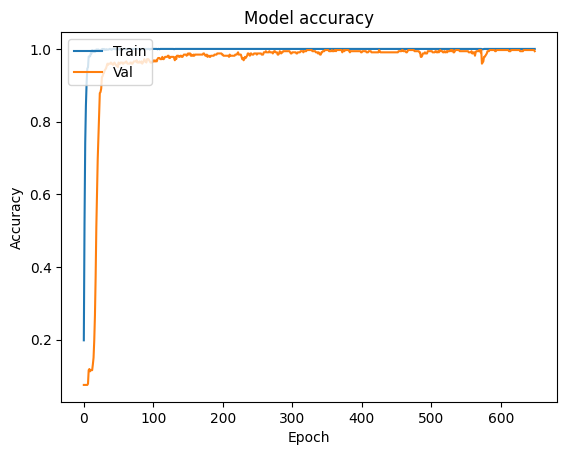

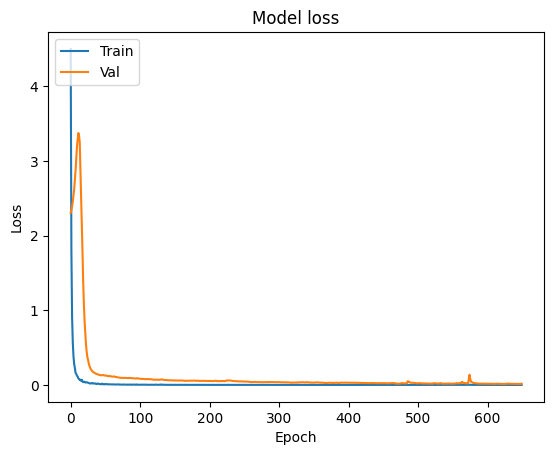

Validation Accuracy: 99.37%
Validation loss: 0.02


<Figure size 640x480 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
## We show the final results
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
plt.clf()


# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
plt.clf()

# We print the final accuracy and loss for the test set.
val_acc = hist.history['val_accuracy'][-1]
val_loss = hist.history['val_loss'][-1]
print("Validation Accuracy: {:.2f}%".format(val_acc * 100))
print("Validation loss: {:.2f}".format(val_loss))

13/13 [==============================] - 0s 6ms/step
Testing Accuracy: 72.00%
Testing loss: 0.92


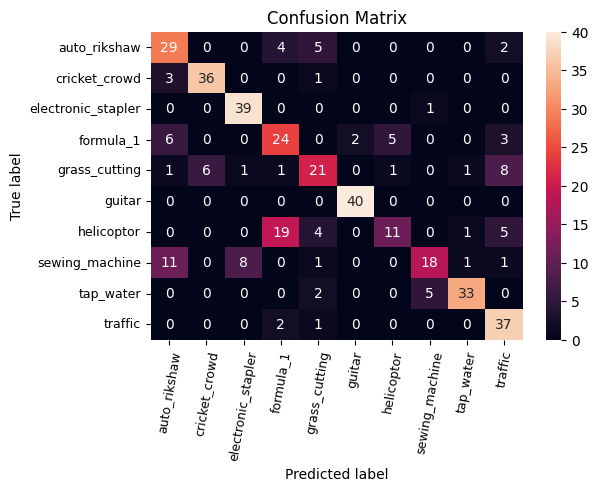

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
model = tf.keras.models.load_model('final_model.h5')
y_pred = model.predict(X_test).argmax(axis=-1)
y_true = y_test.argmax(axis=-1)

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 4))
conf=sns.heatmap(cm, annot=True, fmt='d')
conf.set_xticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])
conf.set_yticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])

# We print the final accuracy and loss for the test set.
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing loss: {:.2f}".format(test_loss))

# Customize the plot,1,1
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

25/25 [==============================] - 0s 6ms/step
Testing Accuracy: 26.50%
Testing loss: 3.93


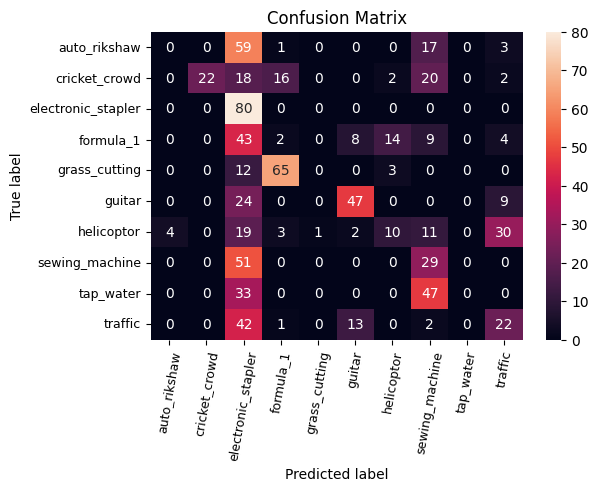

In [102]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import seaborn as sns
# 
model = tf.keras.models.load_model('final_model.h5')
y_pred = model.predict(X_final_DPC).argmax(axis=-1)
y_true = y_final_DPC.argmax(axis=-1)

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 4))
conf=sns.heatmap(cm, annot=True, fmt='d')
conf.set_xticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])
conf.set_yticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])

# We print the final accuracy and loss for the test set.
test_loss, test_accuracy = model.evaluate(X_final_DPC, y_final_DPC, verbose=0)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing loss: {:.2f}".format(test_loss))

# Customize the plot,1,1
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

25/25 [==============================] - 0s 6ms/step


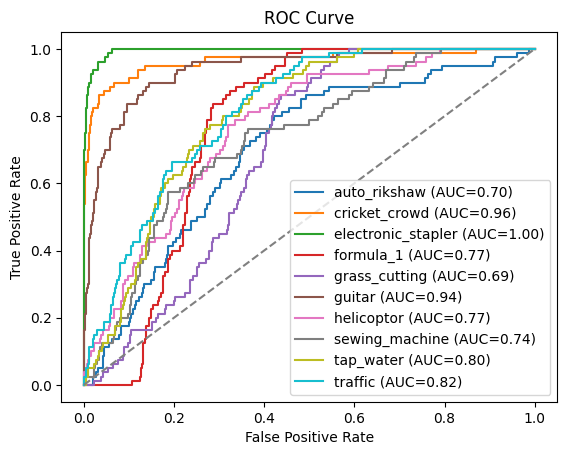

In [104]:
# We draw the ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(X_final_DPC)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], thresholds = roc_curve(y_final_DPC[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

label = ['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic']
    
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{label[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

7/7 [==============================] - 0s 6ms/step
Testing Accuracy: 23.50%
Testing loss: 4.52


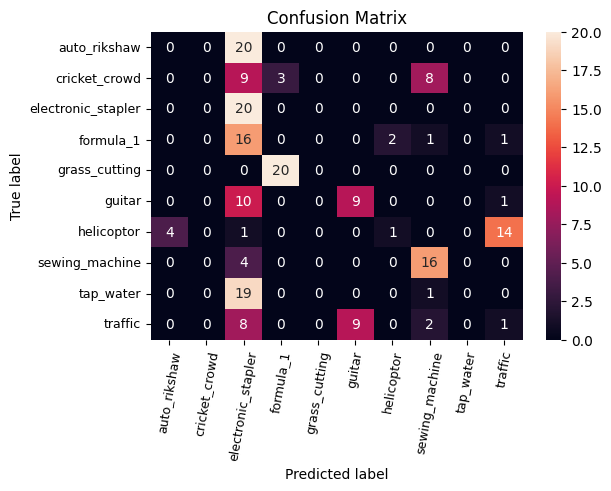

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = tf.keras.models.load_model('final_model.h5')
y_pred = model.predict(X_final_DPC_1).argmax(axis=-1)
y_true = y_final_DPC_1.argmax(axis=-1)

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 4))
conf=sns.heatmap(cm, annot=True, fmt='d')
conf.set_xticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])
conf.set_yticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])

# We print the final accuracy and loss for the test set.
test_loss, test_accuracy = model.evaluate(X_final_DPC_1, y_final_DPC_1, verbose=0)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing loss: {:.2f}".format(test_loss))

# Customize the plot,1,1
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

7/7 [==============================] - 0s 6ms/step


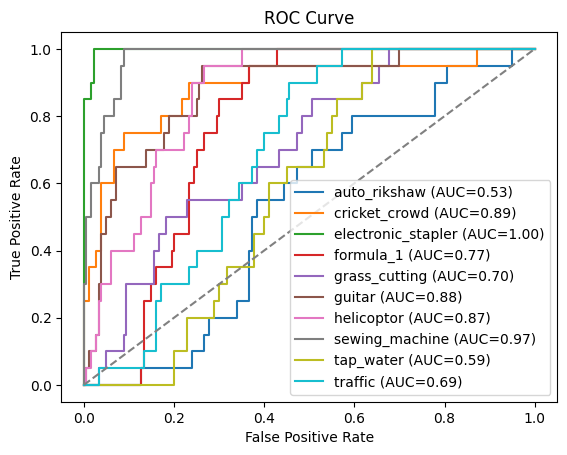

In [106]:
# We draw the ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(X_final_DPC_1)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], thresholds = roc_curve(y_final_DPC_1[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
label = ['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic']
    
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{label[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

7/7 [==============================] - 0s 7ms/step
Testing Accuracy: 24.00%
Testing loss: 3.80


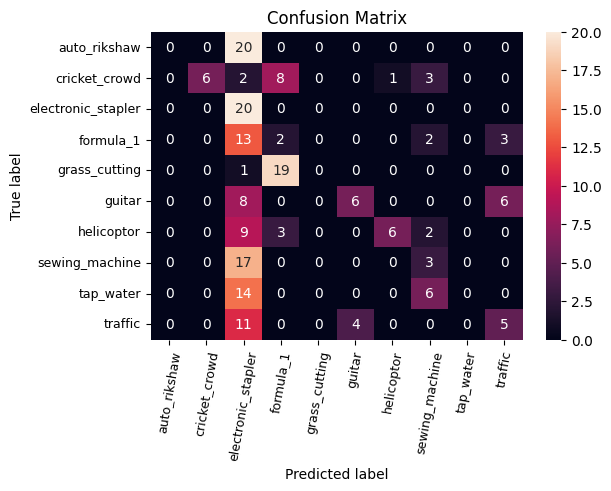

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = tf.keras.models.load_model('final_model.h5')
y_pred = model.predict(X_final_DPC_5).argmax(axis=-1)
y_true = y_final_DPC_5.argmax(axis=-1)

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 4))
conf=sns.heatmap(cm, annot=True, fmt='d')
conf.set_xticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])
conf.set_yticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])

# We print the final accuracy and loss for the test set.
test_loss, test_accuracy = model.evaluate(X_final_DPC_5, y_final_DPC_5, verbose=0)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing loss: {:.2f}".format(test_loss))

# Customize the plot,1,1
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

7/7 [==============================] - 0s 6ms/step


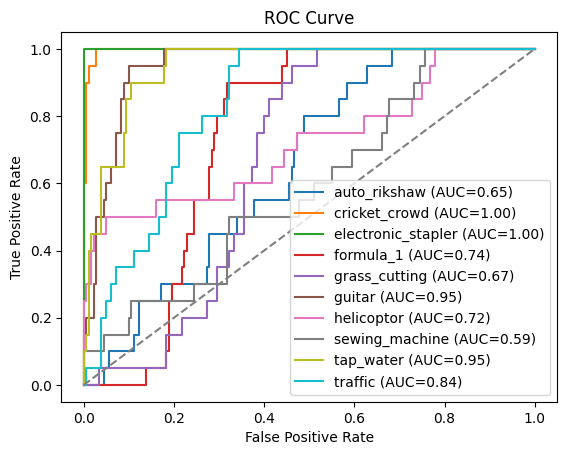

In [108]:
# We draw the ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(X_final_DPC_5)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], thresholds = roc_curve(y_final_DPC_5[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
label = ['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic']
    
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{label[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

7/7 [==============================] - 0s 6ms/step
Testing Accuracy: 25.00%
Testing loss: 3.82


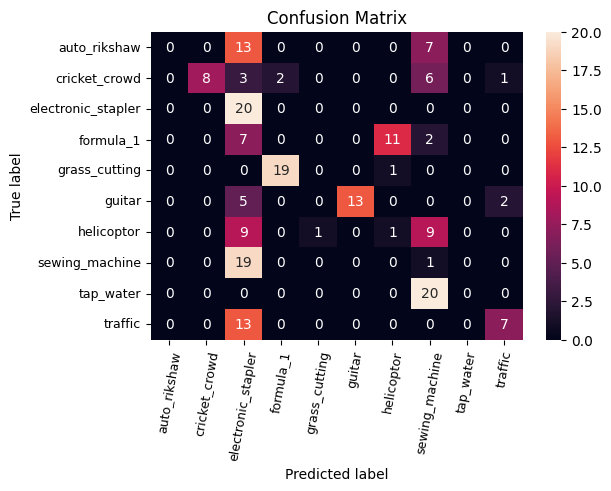

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = tf.keras.models.load_model('final_model.h5')
y_pred = model.predict(X_final_DPC_10).argmax(axis=-1)
y_true = y_final_DPC_10.argmax(axis=-1)

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 4))
conf=sns.heatmap(cm, annot=True, fmt='d')
conf.set_xticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])
conf.set_yticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])

# We print the final accuracy and loss for the test set.
test_loss, test_accuracy = model.evaluate(X_final_DPC_10, y_final_DPC_10, verbose=0)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing loss: {:.2f}".format(test_loss))

# Customize the plot,1,1
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

7/7 [==============================] - 0s 6ms/step


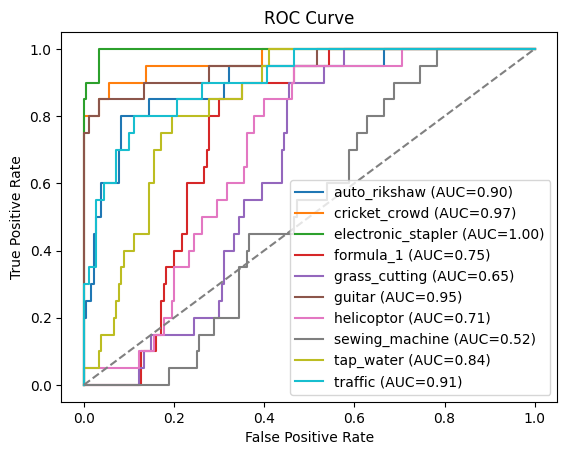

In [110]:
# We draw the ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(X_final_DPC_10)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], thresholds = roc_curve(y_final_DPC_10[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
label = ['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic']
    
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{label[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

7/7 [==============================] - 0s 6ms/step
Testing Accuracy: 33.50%
Testing loss: 3.56


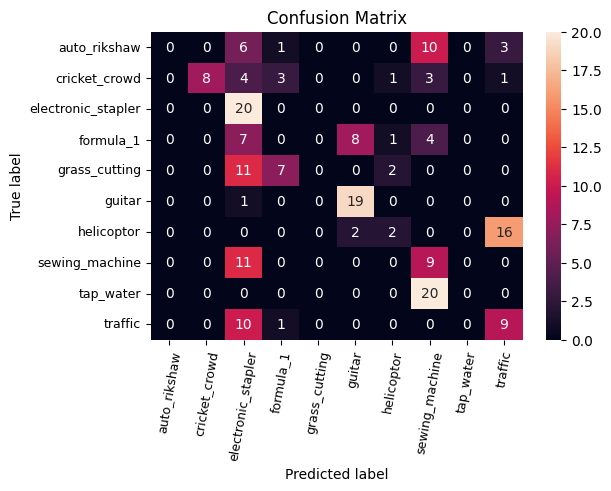

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = tf.keras.models.load_model('final_model.h5')
y_pred = model.predict(X_final_DPC_20).argmax(axis=-1)
y_true = y_final_DPC_20.argmax(axis=-1)

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 4))
conf=sns.heatmap(cm, annot=True, fmt='d')
conf.set_xticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])
conf.set_yticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])

# We print the final accuracy and loss for the test set.
test_loss, test_accuracy = model.evaluate(X_final_DPC_20, y_final_DPC_20, verbose=0)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing loss: {:.2f}".format(test_loss))

# Customize the plot,1,1
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

7/7 [==============================] - 0s 6ms/step


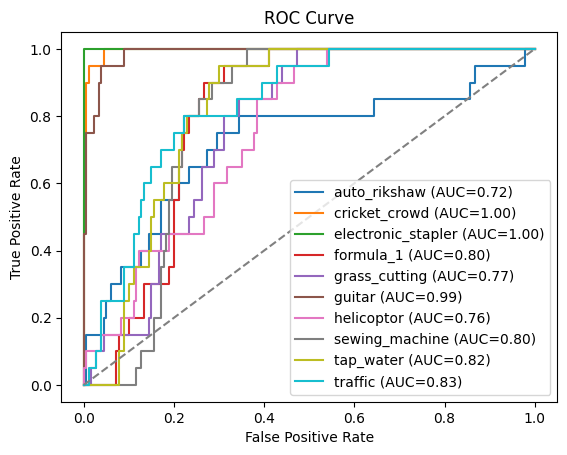

In [112]:
# We draw the ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(X_final_DPC_20)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], thresholds = roc_curve(y_final_DPC_20[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
label = ['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic']
    
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{label[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()